In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg


In [0]:
gambar = cv2.imread('1.jpg')

In [0]:
gambar = cv2.resize(gambar,(1025,480))

In [0]:
def toRGB(imgs):
  imgs = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
  return imgs

In [0]:
def rgb_to_gray(img):
  height, width, channels = img.shape

  for i in range(height):
      for j in range(width):
          img[i,j] = 0.3 * img[i,j][0] + 0.59 * img[i,j][1] +  0.11 * img[i,j][2]  
  
  return img       

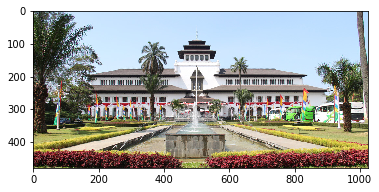

In [0]:
gambarWarna = toRGB(gambar)
gambarAbu = rgb_to_gray(gambar)
plt.imshow(gambarWarna)

In [0]:
numDownSampling = 2
numBilateralFilter = 7

In [0]:
#LANGKAH 1
  #gambar dilakukan downsample menggunakan gaussian pyramid
for _ in range(numDownSampling):
  gambarWarna = cv2.pyrDown(gambarWarna)
gambar1 = gambarWarna

In [0]:
  #ulang dengan menerapkan sedikit filter bilateral
for _ in range(numBilateralFilter):
  gambarWarna = cv2.bilateralFilter(gambarWarna, d=9, sigmaColor = 9, sigmaSpace = 7)
gambar2 = gambarWarna

In [0]:
  #upsamling gambar ke ukuran original
for _ in range(numDownSampling):
  gambarWarna = cv2.pyrUp(gambarWarna)
gambar3 = gambarWarna

In [0]:
#LANGKAH 2 dan 3
  #mengubah gambar ke grayscale dan menerapkan median blur
gambar4 = gambarAbu
gambar_blur = cv2.medianBlur(gambarAbu,5).astype('uint8')
gambar5 = gambar_blur

In [0]:
#LANGKAH 4
  #deteksi tepi gambar
laplacian_image = cv2.Laplacian(gambar5, ddepth=-1,ksize=5)
ret,thresh = cv2.threshold(laplacian_image,125,255,cv2.THRESH_BINARY_INV)
gambar6 = thresh

In [0]:
gambarWarnaBaru = gambar3
gambarWarnaBaru = cv2.resize(gambarWarnaBaru,(1025,480))

In [0]:
gambarWarna.shape

(480, 1028, 3)

In [0]:
thresh = cv2.resize(thresh,(1028,480))

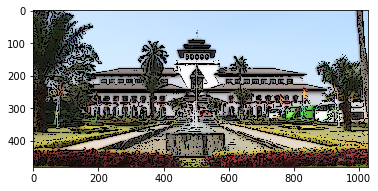

In [0]:
#LANGKAH 5
    #ubah gambar ke berwarna dan di bitwise dengan gambar warna
    cartoon = cv2.bitwise_and(gambarWarna, thresh)
    plt.imshow(cartoon)

Text(0.5, 1.0, 'Cartonized')

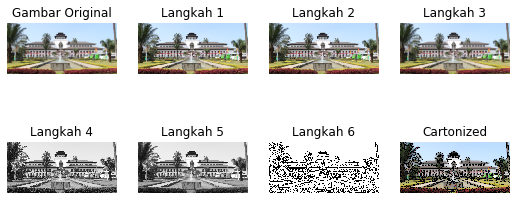

In [0]:
fig = plt.figure()
fig.set_figwidth(9)
a = fig.add_subplot(2,4,1)
imgplot = plt.imshow(gambarWarna)
plt.axis('off')
a.set_title('Gambar Original')
a = fig.add_subplot(2,4,2)
imgplot = plt.imshow(gambar1)
plt.axis('off')
a.set_title('Gambar 1')
a = fig.add_subplot(2, 4, 3)
imgplot = plt.imshow(gambar2)
plt.axis('off')
a.set_title('Gambar 2')
a = fig.add_subplot(2, 4, 4)
imgplot = plt.imshow(gambar3)
plt.axis('off')
a.set_title('Gambar 3')
a = fig.add_subplot(2, 4, 5)
imgplot = plt.imshow(gambar4)
plt.axis('off')
a.set_title('Langkah 4')
a = fig.add_subplot(2, 4, 6)
imgplot = plt.imshow(gambar5)
plt.axis('off')
a.set_title('Gambar 5')
a = fig.add_subplot(2, 4, 7)
imgplot = plt.imshow(gambar6)
plt.axis('off')
a.set_title('Gambar 6')
a = fig.add_subplot(2, 4, 8)
imgplot = plt.imshow(cartoon)
plt.axis('off')
a.set_title('Cartonized')

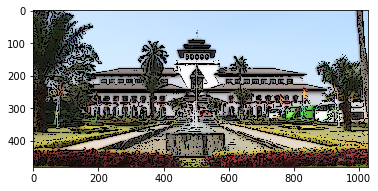

In [0]:
plt.imshow(cartoon)